https://www.kaggle.com/code/nguyenthicamlai/house-prices-prediction
https://www.kaggle.com/code/rebeccaysteboe/regression-algorithms-compared
https://www.kaggle.com/code/omkarborade/house-price-prediction
https://www.kaggle.com/code/serkanp/house-prices-advanced-regression-techniques

seaborn 的底层是matplotlib 

simpleimputer 是缺失值处理

nan, na, null 的关系还不太清楚； na=nan？

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_squared_log_error
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config
from sklearn.model_selection import train_test_split

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, LassoLars, SGDRegressor, Ridge, LogisticRegression, BayesianRidge
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

set_config(display='diagram') 

In [3]:
data_df = pd.read_csv('./train.csv')
data_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


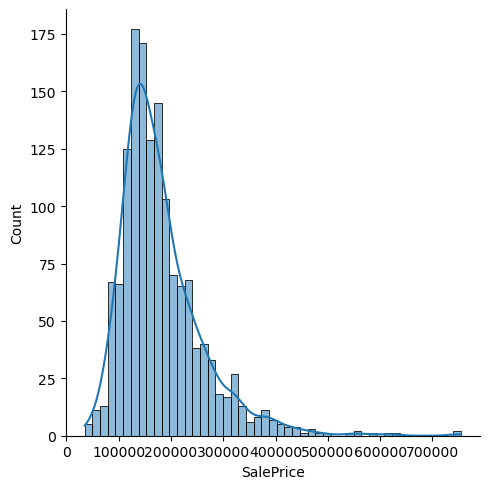

In [4]:
sns.displot(x=data_df['SalePrice'], kde =True)

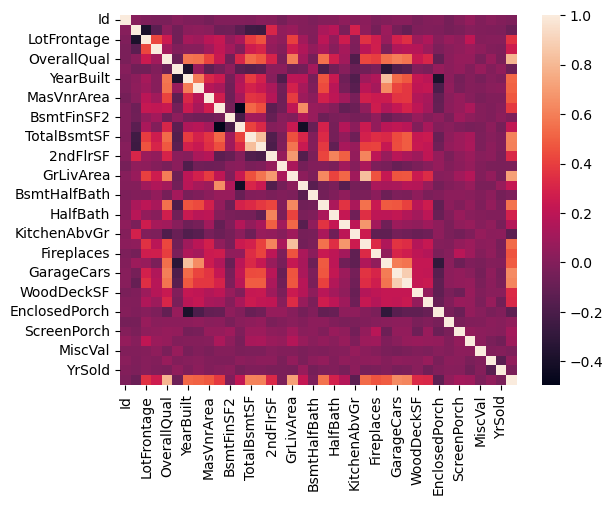

In [7]:
corrmat = data_df.corr()
#plt.subplots(figsize = (12,12))
sns.heatmap(corrmat)
plt.show()

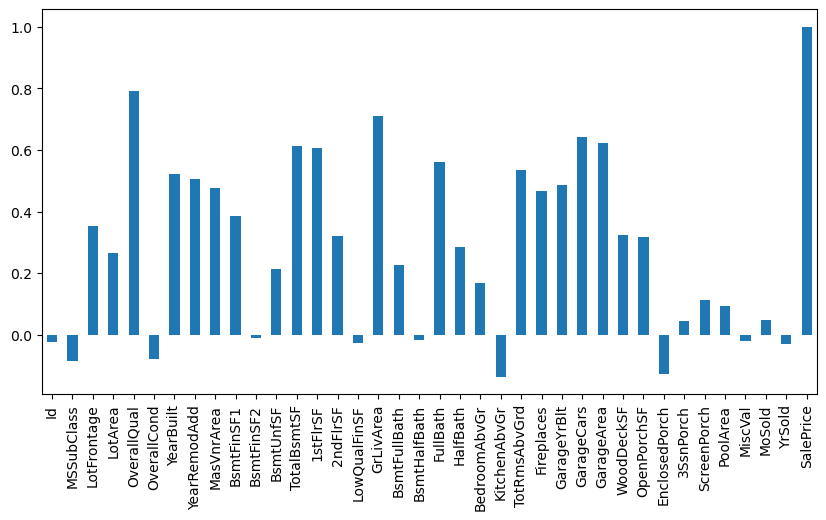

In [12]:
corrmat['SalePrice'].plot(kind = 'bar',figsize= (10,5))
plt.show()

In [81]:
#columns 1-16

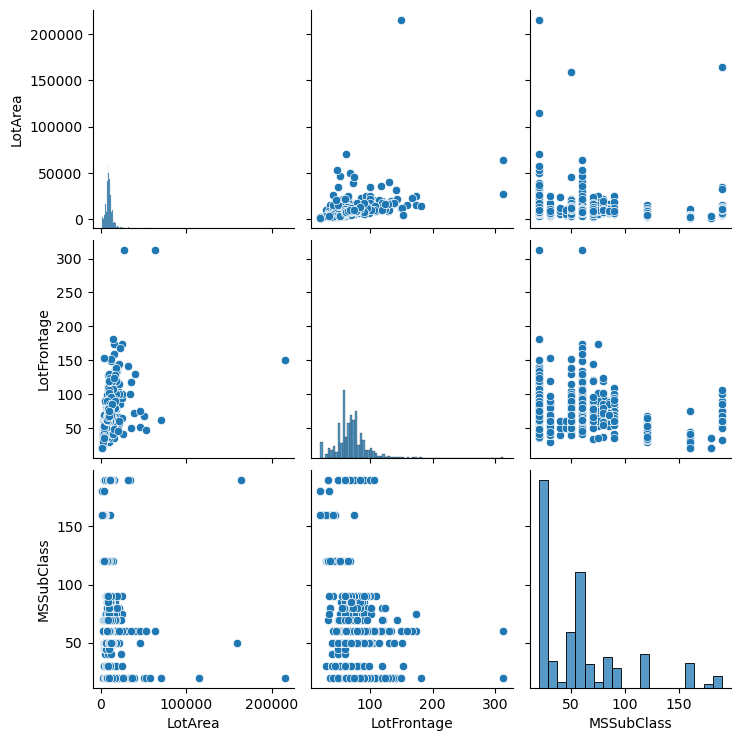

In [16]:
#3个属性和属性之间的散点图
#先取了前3个numerical feature
sns.pairplot(data_df[['LotArea','LotFrontage','MSSubClass']])
plt.show()

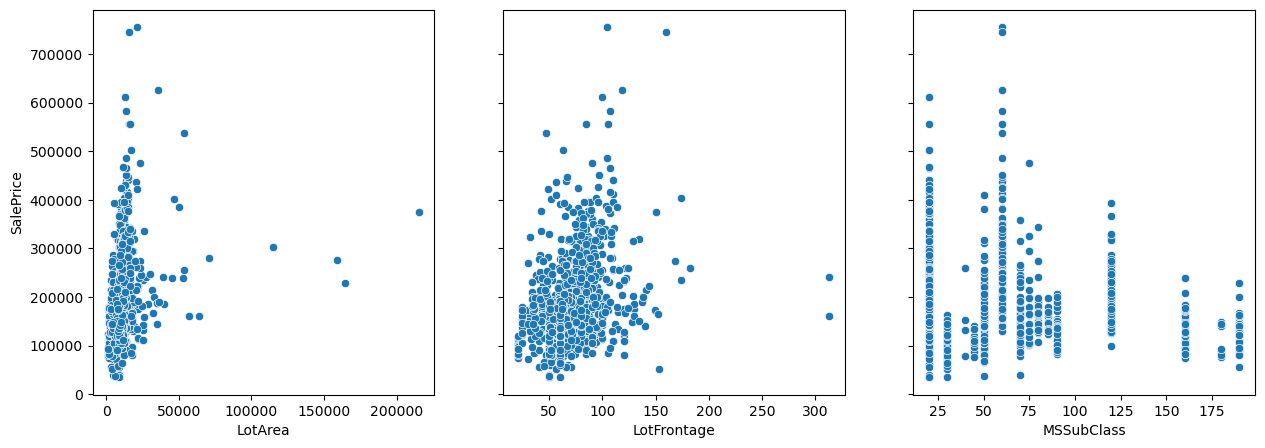

In [48]:
#3个属性和y之间的散点图
#看下每个特征,columns 1-16
#不是所有feature都可以直接这样处理，需要先找到numerical的，所以只有三个；

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
sns.scatterplot(ax=axes[0], x=data_df['LotArea'], y=data_df['SalePrice'])
#axes[0].set_title('LotArea')
sns.scatterplot(ax=axes[1], x=data_df['LotFrontage'], y=data_df['SalePrice'])
sns.scatterplot(ax=axes[2], x=data_df['MSSubClass'], y=data_df['SalePrice'])
plt.show()

In [50]:
modeImputer = SimpleImputer(missing_values = np.nan,  strategy = 'most_frequent')
meanImputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
noneImputer = SimpleImputer(fill_value = 'None', strategy = 'constant') #用constant填充所有的missing values

In [74]:
#LotFrontage 原本是259/1460个空值，空的方式是NA字符串
meanImputer.fit(data_df['LotFrontage'].values.reshape(-1,1))
data_df['LotFrontage'] = meanImputer.transform(data_df['LotFrontage'].values.reshape(-1,1))

In [79]:
#alley 原本是1365/1460个空值，空的方式是NA字符串,看起来导入后有自动识别NA为NaN
noneImputer.fit(data_df['Alley'].values.reshape(-1,1))
data_df['Alley'] = noneImputer.transform(data_df['Alley'].values.reshape(-1,1))

In [82]:
# columns 17-32

In [88]:
#主要是为了补充空值
col17_32 = data_df.columns[17:32]
data_df[col17_32].isnull().sum()

#bsmtqual & bsmtcond 为空意味着没有地下室

OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       8
MasVnrArea       8
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual        37
BsmtCond        37
dtype: int64

In [91]:
data_df['MasVnrType'].value_counts() #这个函数也太方便了比起groupby

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [93]:
print(data_df[data_df['MasVnrType'].isnull()].index)
print(data_df[data_df['MasVnrArea'].isnull()].index)

Int64Index([234, 529, 650, 936, 973, 977, 1243, 1278], dtype='int64')
Int64Index([234, 529, 650, 936, 973, 977, 1243, 1278], dtype='int64')


In [94]:
data_df['BsmtQual'].fillna('None',inplace = True)
data_df['MasVnrType'].fillna('None',inplace = True)
data_df['MasVnrArea'].fillna(0,inplace = True)


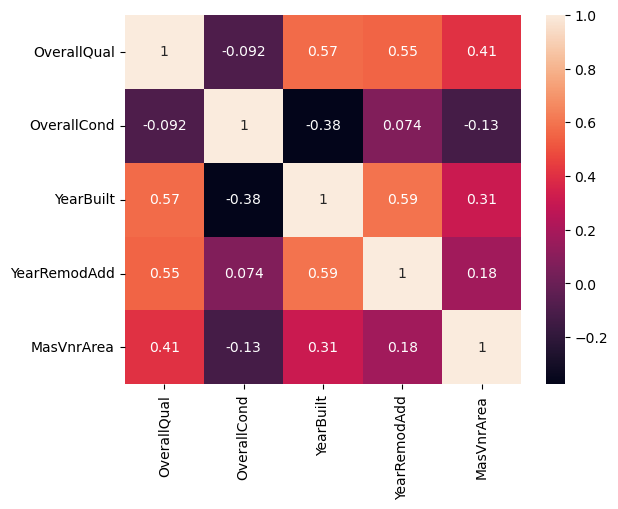

In [96]:
data_corr = data_df[col17_32].corr()
sns.heatmap(data_corr,annot = True)
plt.show()

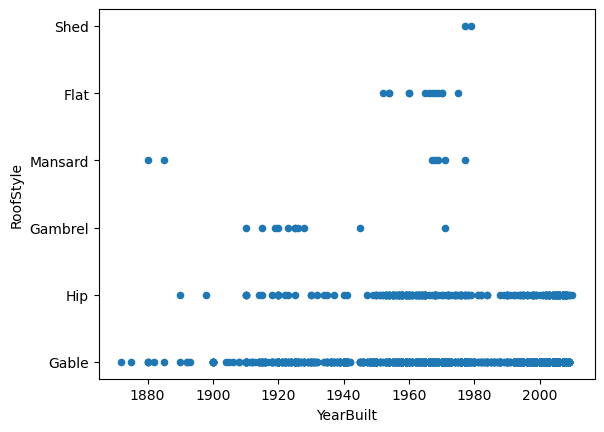

In [99]:
data_df.plot.scatter(x='YearBuilt',y = 'RoofStyle')
plt.show()

In [102]:
#columns 33-48
col33_48 = data_df.columns[33:48]

data_df[col33_48].isnull().sum()

#bsmtfintype 为空表示没有地下室，所以用none填充
#eletrical 1条直接剔除

BsmtFinType1    37
BsmtFinSF1       0
BsmtFinType2    38
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       1
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
dtype: int64

In [105]:
data_df['BsmtFinType1'].fillna('None',inplace = True)
data_df['BsmtFinType2'].fillna('None',inplace = True)
data_df = data_df[~data_df['Electrical'].isnull()]

In [106]:
data_df[col33_48].isnull().sum()


BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
Heating         0
HeatingQC       0
CentralAir      0
Electrical      0
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
GrLivArea       0
BsmtFullBath    0
dtype: int64

In [ ]:
#data_df['Alley'].to_excel('./test.xlsx')